# **Project Title: Data-driven approach to predict Electrical Vehicle Sales**
# **Team Members:**
- Harshul Kumar (2024OAI1019)
- Himanshu Bhardwaj (2024OAI1020)
- Kanishk Malik (2024OAI1022)
- Ravi Choudhary (2024OAI1040)
- Satendra Kumar (2024OAI1045)

## **Subject**: Machine Learning
## **Cohort**: 4
## **Group**: 4

## **Project Overview:**
As the world moves rapidly toward sustainable energy, electric vehicles (EVs) are becoming a cornerstone of modern transportation.

Machine learning (ML) is stepping in to make EV sales predictions smarter and more dependable. By uncovering complex patterns in diverse datasets, ML models bring a fresh level of accuracy to forecasting. Cutting-edge approaches—like ensemble methods, deep neural networks, and hybrid models—push the boundaries even further, delivering powerful predictions while tackling the challenges of interpretability and scalability.

**Dynamic EV Market:**

*   The EV market is rapidly evolving, influenced by technology, government policies, and consumer preferences.
*   Accurate sales forecasting is essential for manufacturing, policy planning, and infrastructure development.

**Limitations of Traditional Methods:**

*   Statistical models fail to capture nonlinear relationships and complex
interactions.
*   Traditional approaches lack adaptability to dynamic market conditions.

**Integration of Diverse Data:**

*   External factors like economic trends, technological advancements, consumer sentiment, and charging
*   infrastructure improve forecasting accuracy.

**Addressing Key Challenges:**

*   Tackles issues like data scarcity, scalability, and model interpretability.
*   Provides robust, adaptable frameworks for forecasting.


**Practical Contributions:**

*   Offers actionable insights for stakeholders, including policymakers, manufacturers, and energy planners.
*   Facilitates informed decision-making to align supply chains, infrastructure, and policies with market demand.

**Future Implications:**

*  Encourages the adoption of advanced ML models for sustainable growth in the EV sector.
*  Bridges the gap between theoretical research and real-world applications in the EV ecosystem.

## **Step 1:** **Import Libraries**

In [ ]:
# Mounting google drive and using Google colab as collaboration tool

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Libraries for data wrangling and visualization operations

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import Libraries to build and analyze models

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import KFold

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm

# **Data Description**

This Electric Vehicle (EV) Sales and Adoption dataset contains detailed records of electric vehicle sales, including vehicle details, region, customer segments, and sales metrics. It aims to help data enthusiasts and businesses forecast EV sales, analyze market trends, and derive insights to improve marketing and inventory strategies.

# 🔑 **Key Features:**

**Date:** Represents a month in YYYY-MM format.

**Region:** Geographic region where sales took place.

**Brand:** Automotive brand (e.g., Tesla, BYD, Volkswagen, etc.).

**Model:** Specific EV model name.

**Vehicle_Type:** Category (Sedan, SUV, Hatchback, etc.).

**Battery_Capacity_kWh**: Battery capacity in kilowatt-hours.

**Discount_Percentage:** Any discount applied to final sale (%).

**Customer_Segment:** Broad segmentation (High Income, Tech Enthusiast, Eco-Conscious, etc.).

**Fast_Charging_Option:** Indicates if the vehicle supports fast-charging.

**Units_Sold:** Total number of units sold (in train.csv).

**Revenue:** Total revenue from units sold (in train.csv).


##**Step2: Data Sources:**
1) Kaggle: https://www.kaggle.com/datasets/rameezmeerasahib/electric-vehicle-ev-sales-and-adoption/data

2) IEA Data: https://www.iea.org/data-and-statistics/data-tools/global-ev-data-explorer

In [ ]:
# train = pd.read_csv('/content/train_updated_v3.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML-Project/EV Sales Dataset/train_updated_v3.csv')

In [ ]:
test =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML-Project/EV Sales Dataset/test.csv')

### 2.1: Train Dataset information and sample records

In [ ]:
train.shape

(531, 10)

In [ ]:
# Sample Records
train.head()

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold
0,2024-07,Oceania,Toyota,i4,Crossover,60.084153,6.025559,High Income,No,133.340719
1,2024-03,Oceania,Toyota,Leaf,Truck,67.058251,18.953440,High Income,Yes,155.244623
2,2024-05,North America,Toyota,ID.5,Crossover,84.031469,13.006385,Middle Income,No,155.790594
3,2024-02,Oceania,Tesla,Corolla EV,Truck,73.646300,3.854783,High Income,Yes,130.724024
4,2024-10,North America,BYD,Leaf,Coupe,49.498818,4.082615,High Income,No,120.654082


### Observations:
- The dataset has 531 records and 10 variables.
- The dataset has EV units sold quantity for all months of year 2024.
- Units_Sold is the dependent variable that we want to predict.
- There are 2 numerical features: "Battery_Capacity_kWh" and "Discount_Percentage".

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  531 non-null    object 
 1   Region                531 non-null    object 
 2   Brand                 531 non-null    object 
 3   Model                 531 non-null    object 
 4   Vehicle_Type          531 non-null    object 
 5   Battery_Capacity_kWh  531 non-null    float64
 6   Discount_Percentage   531 non-null    float64
 7   Customer_Segment      531 non-null    object 
 8   Fast_Charging_Option  531 non-null    object 
 9   Units_Sold            531 non-null    float64
dtypes: float64(3), object(7)
memory usage: 41.6+ KB


In [ ]:
# Numerical features analysis
train.describe()

,Battery_Capacity_kWh,Discount_Percentage,Units_Sold
count,531.000000,531.000000,531.000000
mean,69.386690,8.975832,138.591733
std,17.810417,5.925203,10.453851
min,38.297790,0.000000,113.707909
25%,53.064155,3.132482,131.177042
50%,69.137692,8.286440,138.158087
75%,84.028050,14.075789,146.513451
max,104.804674,20.747974,165.683860


In [ ]:
train.dtypes

,0
Date,object
Region,object
Brand,object
Model,object
Vehicle_Type,object
Battery_Capacity_kWh,float64
Discount_Percentage,float64
Customer_Segment,object
Fast_Charging_Option,object
Units_Sold,float64


In [ ]:
print ("# of duplicate records in training data: ",train.duplicated().sum(),"\n")

train.isnull().sum()

# of duplicate records in training data:  0 



,0
Date,0
Region,0
Brand,0
Model,0
Vehicle_Type,0
Battery_Capacity_kWh,0
Discount_Percentage,0
Customer_Segment,0
Fast_Charging_Option,0
Units_Sold,0


### Observations:
- There are no duplicate records in training data.
- No null values observed in training data.

## **Step 3: Data Visualization**

In [ ]:
# Converting the "YYYY-MM" format string values in Date field to datetime datatype and extract Year and Month field
train['Date'] = pd.to_datetime(train['Date'])
# Comput Year and Month field
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month

# Addming Year and Month fields to test dataset as well
test['Date'] = pd.to_datetime(test['Date'])
# Comput Year and Month field
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month

print('Year and Month fields added to the dataset')

display(train)

Year and Month fields added to the dataset


,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold,Year,Month
0,2024-07-01,Oceania,Toyota,i4,Crossover,60.084153,6.025559,High Income,No,133.340719,2024,7
1,2024-03-01,Oceania,Toyota,Leaf,Truck,67.058251,18.953440,High Income,Yes,155.244623,2024,3
2,2024-05-01,North America,Toyota,ID.5,Crossover,84.031469,13.006385,Middle Income,No,155.790594,2024,5
3,2024-02-01,Oceania,Tesla,Corolla EV,Truck,73.646300,3.854783,High Income,Yes,130.724024,2024,2
4,2024-10-01,North America,BYD,Leaf,Coupe,49.498818,4.082615,High Income,No,120.654082,2024,10
...,...,...,...,...,...,...,...,...,...,...,...,...
526,2024-08-01,Oceania,Nissan,Ariya,Hatchback,81.504795,13.858655,High Income,Yes,148.161649,2024,8
527,2024-11-01,Asia,Hyundai,Ariya,Truck,49.273070,2.955613,High Income,No,119.236815,2024,11
528,2024-04-01,North America,BYD,Han EV,Hatchback,78.437486,8.239384,Budget Conscious,No,141.589215,2024,4
529,2024-05-01,Asia,Volkswagen,Model S,Crossover,42.175325,4.972959,High Income,No,130.095681,2024,5


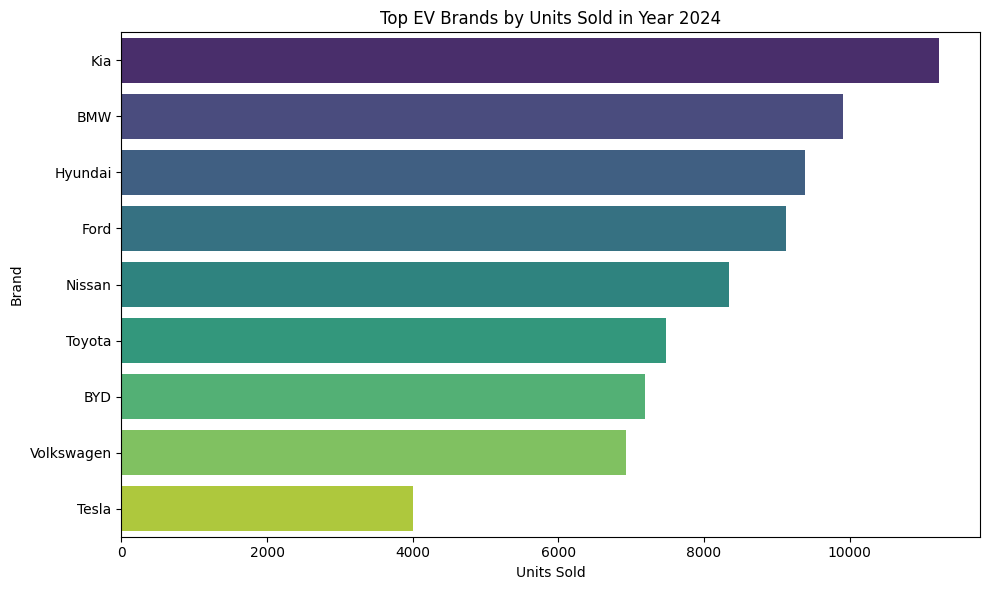

In [ ]:
# Find Popular EV brands

top_brands = train.groupby('Brand')['Units_Sold'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title('Top EV Brands by Units Sold in Year 2024')
plt.xlabel('Units Sold')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

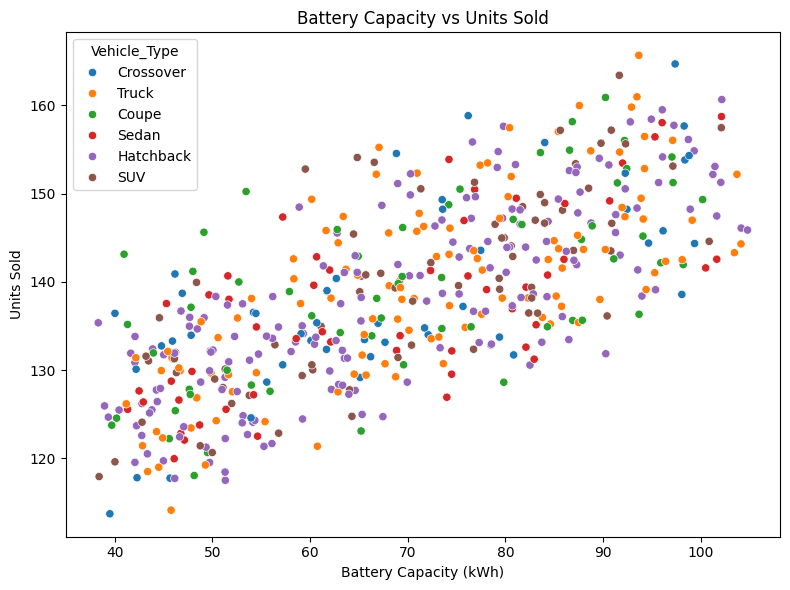

In [ ]:
# Battery capacity and EV Units sold by vehicle type

plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='Battery_Capacity_kWh', y='Units_Sold', hue='Vehicle_Type')
plt.title('Battery Capacity vs Units Sold')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()


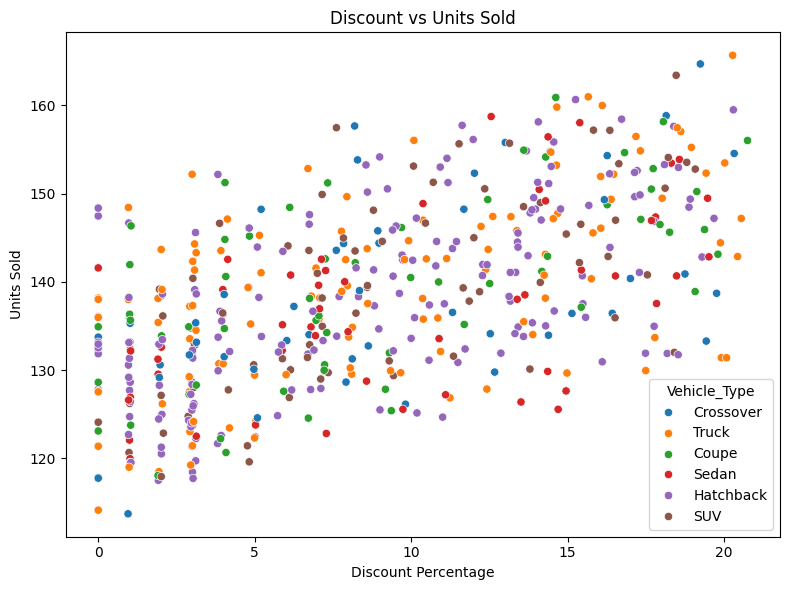

In [ ]:
# Discount_Percentage and EV Units sold by vehicle type

plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='Discount_Percentage', y='Units_Sold', hue='Vehicle_Type')
plt.title('Discount vs Units Sold')
plt.xlabel('Discount Percentage')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()



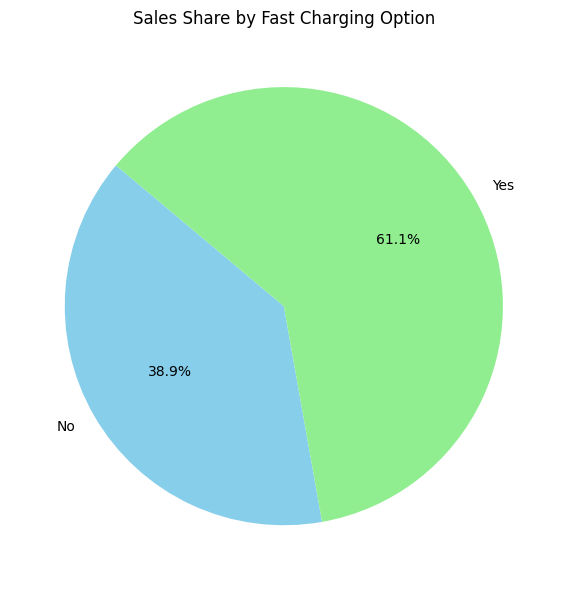

In [ ]:
# Fast Charging Option and Units Sold

fast_charge = train.groupby('Fast_Charging_Option')['Units_Sold'].sum()
plt.figure(figsize=(6, 6))
fast_charge.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Sales Share by Fast Charging Option')
plt.ylabel('')
plt.tight_layout()
plt.show()

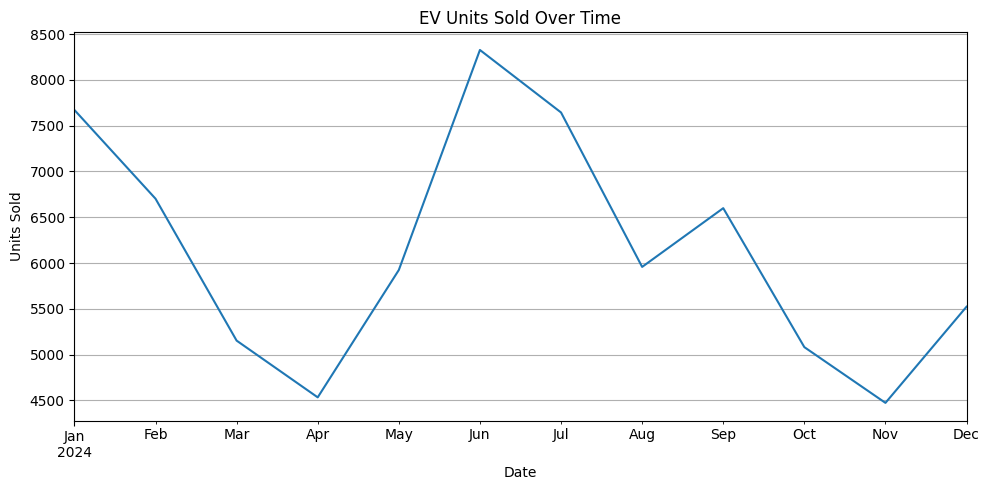

In [ ]:
# Trend for EV units sold quantity over different months

monthly_sales = train.groupby(train['Date'].dt.to_period('M'))['Units_Sold'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
plt.figure(figsize=(10, 5))
monthly_sales.plot()
plt.title('EV Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

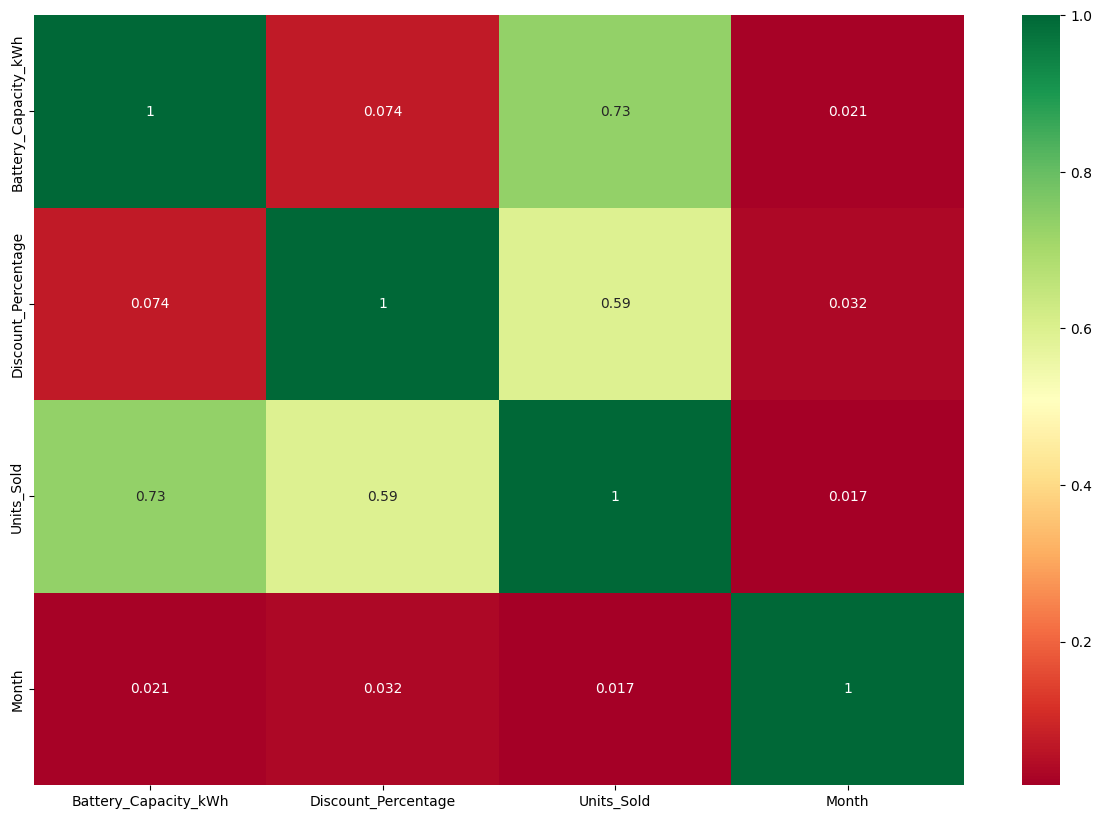

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    train[
        [
            'Battery_Capacity_kWh',
            'Discount_Percentage',
            'Units_Sold',
            'Month'
        ]
    ].corr(),
    cmap="RdYlGn",
    annot=True,
)
plt.show()

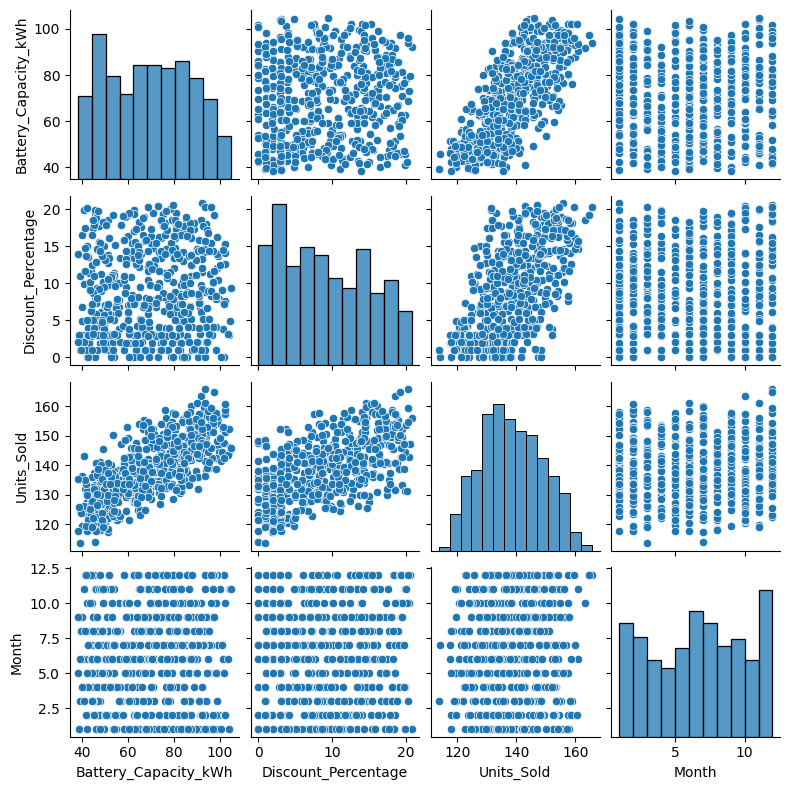

In [ ]:
sns.pairplot(train[
        [
            'Battery_Capacity_kWh',
            'Discount_Percentage',
            'Units_Sold',
            'Month'
        ]
    ], height = 2)

plt.show()

## **Step 4: Data Normalization**




In [ ]:
# Creating another dataframe
df = train

In [ ]:
# Normalize the numerical features between 0 and 1 using MinMaxScaler: Fit Transform on Train Data

scaler = MinMaxScaler()
# numerical_cols = df.select_dtypes(include=["number"]).columns
numerical_ind_cols = ["Battery_Capacity_kWh","Discount_Percentage"]
print (numerical_ind_cols)
df[numerical_ind_cols] = scaler.fit_transform(train[numerical_ind_cols])
display(df)

# df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])
# display(df)
# df.shape

['Battery_Capacity_kWh', 'Discount_Percentage']


,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold,Year,Month
0,2024-07-01,Oceania,Toyota,i4,Crossover,0.327581,0.290417,High Income,No,133.340719,2024,7
1,2024-03-01,Oceania,Toyota,Leaf,Truck,0.432443,0.913508,High Income,Yes,155.244623,2024,3
2,2024-05-01,North America,Toyota,ID.5,Crossover,0.687653,0.626875,Middle Income,No,155.790594,2024,5
3,2024-02-01,Oceania,Tesla,Corolla EV,Truck,0.531502,0.185791,High Income,Yes,130.724024,2024,2
4,2024-10-01,North America,BYD,Leaf,Coupe,0.168419,0.196772,High Income,No,120.654082,2024,10
...,...,...,...,...,...,...,...,...,...,...,...,...
526,2024-08-01,Oceania,Nissan,Ariya,Hatchback,0.649662,0.667952,High Income,Yes,148.161649,2024,8
527,2024-11-01,Asia,Hyundai,Ariya,Truck,0.165025,0.142453,High Income,No,119.236815,2024,11
528,2024-04-01,North America,BYD,Han EV,Hatchback,0.603542,0.397118,Budget Conscious,No,141.589215,2024,4
529,2024-05-01,Asia,Volkswagen,Model S,Crossover,0.058303,0.239684,High Income,No,130.095681,2024,5


In [ ]:
# Normalize the numerical features between 0 and 1 using MinMaxScaler: Only Transform on Test Data
test[numerical_ind_cols] = scaler.transform(test[numerical_ind_cols])
display(test)

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Year,Month
0,2023-04-01,Oceania,Volkswagen,Model 3,SUV,0.100775,0.771160,Budget Conscious,No,2023,4
1,2023-10-01,Oceania,Ford,Model 3,Sedan,0.762360,0.240987,Tech Enthusiast,Yes,2023,10
2,2023-10-01,South America,Volkswagen,Atto 3,Sedan,0.341351,0.192790,Budget Conscious,Yes,2023,10
3,2023-02-01,Africa,Volkswagen,Corolla EV,Crossover,0.927757,0.771160,Eco-Conscious,No,2023,2
4,2023-10-01,North America,Tesla,Rio EV,Sedan,0.476676,0.385580,Eco-Conscious,Yes,2023,10
...,...,...,...,...,...,...,...,...,...,...,...
270,2023-08-01,Oceania,BMW,Tucson EV,SUV,0.371423,0.192790,Eco-Conscious,Yes,2023,8
271,2023-02-01,Africa,Hyundai,Mach-E,Hatchback,0.822504,0.433777,Eco-Conscious,Yes,2023,2
272,2023-01-01,Africa,BMW,Model 3,Crossover,0.341351,0.481975,High Income,Yes,2023,1
273,2023-07-01,Oceania,Nissan,Atto 3,SUV,0.145883,0.963950,Eco-Conscious,Yes,2023,7


## **Step 5: Convert categorical features to numerical features using one hot encoding**

In [ ]:
independent_variables = ['Region', 'Brand', 'Model', 'Vehicle_Type', 'Battery_Capacity_kWh', 'Discount_Percentage', 'Customer_Segment', 'Fast_Charging_Option', 'Year', 'Month']

# Copy and separate features and target
X = df[independent_variables].copy()
y = df['Units_Sold']

# One-hot encoding of categorical features: Training data
X = pd.get_dummies(X, columns=['Region', 'Brand', 'Model', 'Vehicle_Type', 'Customer_Segment', 'Fast_Charging_Option','Month'], drop_first=True)

# Applying same one-hot encoding on test data, so the model can be applied to test data
test = pd.get_dummies(test, columns=['Region', 'Brand', 'Model', 'Vehicle_Type', 'Customer_Segment', 'Fast_Charging_Option','Month'], drop_first=True)

# Reindex the test data to match the training data's columns
test_data_encoded_aligned = test.reindex(columns=X.columns, fill_value=0)



In [ ]:
# Split into training and validation for our predictor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Data prepared for modeling. Shape of training features:', X_train.shape)

display(X_train)

Data prepared for modeling. Shape of training features: (424, 53)


,Battery_Capacity_kWh,Discount_Percentage,Year,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America,Brand_BYD,Brand_Ford,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
407,0.579468,0.515931,2024,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
527,0.165025,0.142453,2024,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
176,0.667459,0.414166,2024,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
373,0.151377,0.680810,2024,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
69,0.622797,0.489979,2024,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.140443,0.856114,2024,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
106,0.406429,0.097995,2024,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
270,0.540175,0.894999,2024,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
435,0.952628,0.343840,2024,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


## **Step 6: Finding meaningful features using RFECV (Recursive Feature Elimination using cross validation)**

In [ ]:
# Initialize the Linear Regression estimator
estimator = LinearRegression()

# Initialize K-Fold cross-validation
# shuffle=True and random_state are important for reproducibility
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
rfecv = RFECV(
    estimator=estimator,
    step=1,
    cv=cv_strategy,
    scoring='neg_mean_squared_error',
    min_features_to_select=1
)

# Fit RFECV to the data
rfecv.fit(X_train, y_train)

RFECV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
      estimator=LinearRegression(), scoring='neg_mean_squared_error')

In [ ]:
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 3


In [ ]:
# Creating a dataframe highlighting rfe support and ranking

list_rfe = []
for x, y, z in sorted(list(zip(X_train.columns, rfecv.support_, rfecv.ranking_))):
  list_rfe.append([x, y, z])

df_rfe = pd.DataFrame(list_rfe, columns =['column','rfe_support','rfe_ranking'])
display(df_rfe.sort_values(by='rfe_ranking', ascending=True))

,column,rfe_support,rfe_ranking
0,Battery_Capacity_kWh,True,1
13,Discount_Percentage,True,1
25,Model_Model S,True,1
50,Vehicle_Type_Sedan,False,2
1,Brand_BYD,False,3
39,Month_7,False,4
26,Model_Model Y,False,5
3,Brand_Hyundai,False,6
4,Brand_Kia,False,7
6,Brand_Tesla,False,8


### Observations:
- RFECV highlighted a total of 3 optimal features. However, we will go ahead and consider upto rank 15.
- We will analyze the result and remove the least important features based on our analysis
- We see Month_3 as one of the variables. Currently, we are interested in finding factors impacting EV sales and Month correlation may be just by chance. Excluding Month_3 from the list of features. We will consider time dimension when we extend this project and do the time series forecasting.

In [ ]:
features = df_rfe[df_rfe['rfe_ranking'] <= 15]['column'].tolist()

features = [item for item in features if not item.startswith('Month_')]

features

['Battery_Capacity_kWh',
 'Brand_BYD',
 'Brand_Hyundai',
 'Brand_Kia',
 'Brand_Tesla',
 'Customer_Segment_Eco-Conscious',
 'Discount_Percentage',
 'Model_Corolla EV',
 'Model_Model S',
 'Model_Model Y',
 'Model_Tucson EV',
 'Model_iX',
 'Region_Europe',
 'Vehicle_Type_Sedan']

## **Step 7: Finding VIF (Variance Inflation Factor) to detect multicollinearity between features**

In [ ]:
# VIF needs numeric data types, hence converting boolean data types to numeric data types.
# Identify boolean columns
boolean_cols = X_train.select_dtypes(include='bool').columns

# Convert identified boolean columns to integer (0 or 1)
X_train[boolean_cols] = X_train[boolean_cols].astype(int)

In [ ]:
# Using features extracted in above step

vif_df = pd.DataFrame()
vif_df["features"] = X_train[features].columns
vif_df["VIF"] = [vif(X_train[features].values, i) for i in range(X_train[features].shape[1])]
vif_df.sort_values(by='VIF', ascending=False)
vif_df

,features,VIF
0,Battery_Capacity_kWh,2.557406
1,Brand_BYD,1.128428
2,Brand_Hyundai,1.215563
3,Brand_Kia,1.252094
4,Brand_Tesla,1.094665
5,Customer_Segment_Eco-Conscious,1.206454
6,Discount_Percentage,2.484489
7,Model_Corolla EV,1.100684
8,Model_Model S,1.034232
9,Model_Model Y,1.043351


### Observations:
- VIF value is low for all selected features, indicating very little multicollinearity that can be ignored.

## **Step 8: Remove insignificant features based on p-value of hypothesis test**

In [ ]:
# Identify boolean columns
boolean_cols = X_train.select_dtypes(include='bool').columns

# Convert identified boolean columns to integer (0 or 1)
X_train[boolean_cols] = X_train[boolean_cols].astype(int)

X_train_sm = sm.add_constant(X_train[features])
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:             Units_Sold   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     151.5
Date:                Sun, 20 Jul 2025   Prob (F-statistic):          5.56e-152
Time:                        07:37:13   Log-Likelihood:                -1210.2
No. Observations:                 424   AIC:                             2450.
Df Residuals:                     409   BIC:                             2511.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Observations:
- Stats model highlight P-value for every feature. Considering relaxed 95% confidence interval for hypothesis test, we will ignore all features where P-value >= 0.05
- Basis this, we will ignore these feature:
    - Brand_Tesla
    - Brand_Hyundai                     
    - Brand_Kia                                              
    - Model_Corolla EV
    - Model_Model S
    - Model_Model Y
    - Model_Tucson EV
    - Model_iX
    - Region_Europe


In [ ]:
features_to_remove = ["Brand_Tesla",	"Brand_Hyundai",	"Brand_Kia",	"Model_Corolla EV",	"Model_Model S",	"Model_Model Y",	"Model_Tucson EV",	"Model_iX",	"Region_Europe"]
filtered_features = [feature for feature in features if feature not in features_to_remove]
filtered_features

['Battery_Capacity_kWh',
 'Brand_BYD',
 'Customer_Segment_Eco-Conscious',
 'Discount_Percentage',
 'Vehicle_Type_Sedan']

## **Step 9: Build and fit the models using these features:**
- Random Forest
- Linear Regression
- Gradient Boosting
- KNN
- XGBoost

### 9.1: Without regularizer

Models accuracy and comparison (On Validation Data):



,Model,R2_Score (%),RMSE
1,Linear Regression,84.553081,4.081280
2,Gradient Boosting,81.835584,4.425742
3,KNN,80.145619,4.627044
0,Random Forest,78.585676,4.805378
4,XGBoost,74.850120,5.207669


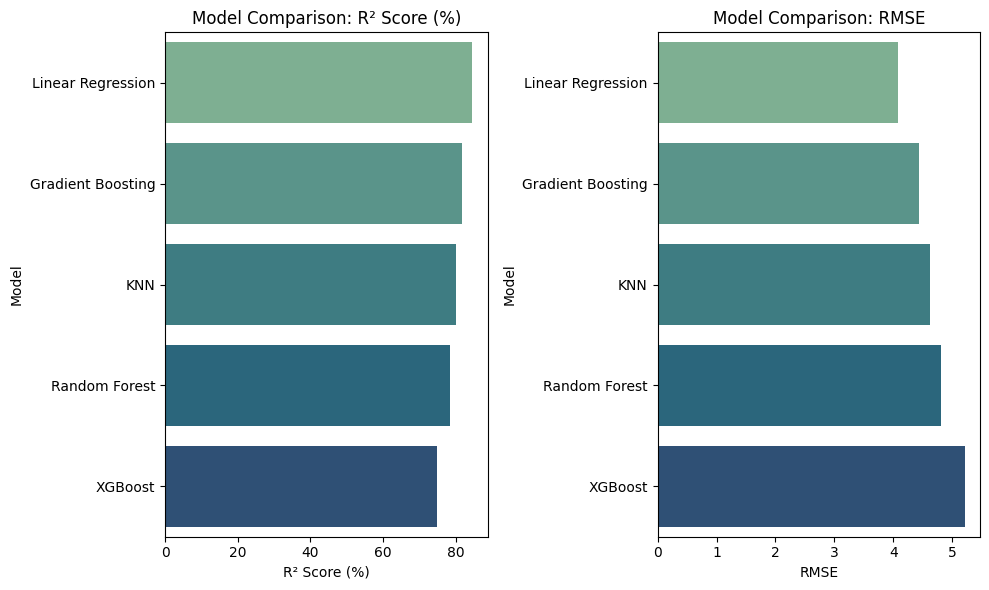

In [ ]:
# Model dictionary
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}


# Evaluate models
results = []

for name, model in models.items():
    model.fit(X_train[filtered_features], y_train)
    y_pred = model.predict(X_test[filtered_features])

    r2 = r2_score(y_test, y_pred) * 100  # percentage
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, r2, rmse))
    # print(f"{name}: R² = {r2:.2f}%, RMSE = {rmse:.2f}")

# Visualize performance
results_df = pd.DataFrame(results, columns=['Model', 'R2_Score (%)', 'RMSE']).sort_values('R2_Score (%)', ascending=False)

print ("Models accuracy and comparison (On Validation Data):\n")
display(results_df)

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.barplot(data=results_df, x='R2_Score (%)', y='Model', palette='crest')
plt.title('Model Comparison: R² Score (%)')
plt.xlabel('R² Score (%)')
plt.ylabel('Model')
plt.tight_layout()

plt.subplot(1,2,2)
sns.barplot(data=results_df, x='RMSE', y='Model', palette='crest')
plt.title('Model Comparison: RMSE')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.tight_layout()

plt.show()

### Observations:
- Linear Regression is providing the best results. It has high R2 score and low RMSE.

### 9.2 Use Ridge regularization (wherever applicable)

Models accuracy and comparison (On Validation Data):



,Model,R2_Score (%),RMSE
1,Linear Regression,84.826212,4.045036
2,Gradient Boosting,82.454402,4.349702
3,KNN,80.145619,4.627044
0,Random Forest,78.585676,4.805378
4,XGBoost,76.384016,5.046362


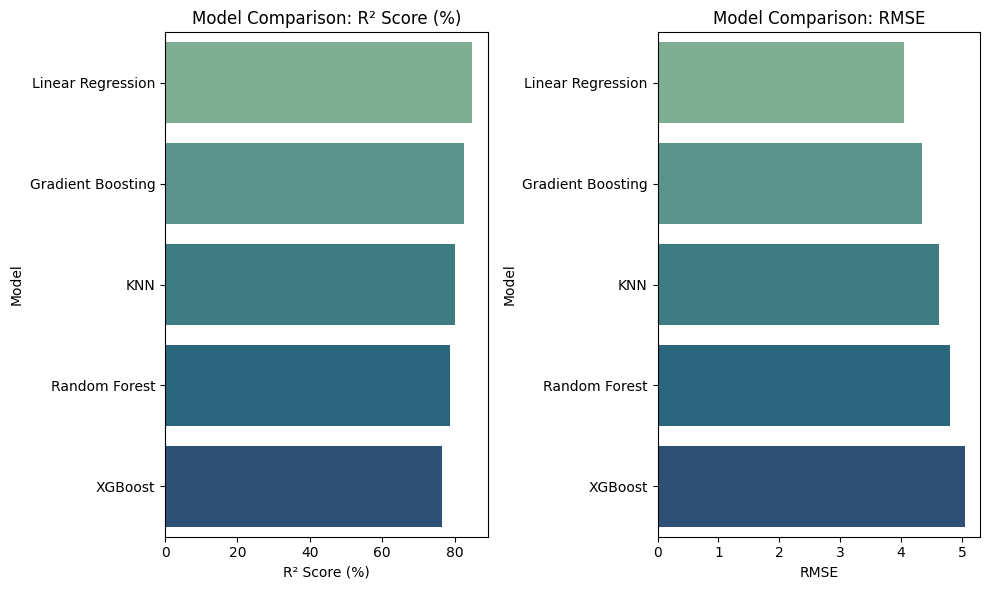

In [ ]:
# Model dictionary
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': Ridge(alpha=1.0, random_state=42),  #L2(Ridge) regularization
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.05, max_depth=3, subsample=0.8),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate = 0.1, gamma=0.2, random_state=42, verbosity=0, reg_lambda=0.5)  # L2 regularization in XGBoost
}

# Evaluate models
results = []

for name, model in models.items():
    model.fit(X_train[filtered_features], y_train)
    y_pred = model.predict(X_test[filtered_features])

    r2 = r2_score(y_test, y_pred) * 100  # percentage
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, r2, rmse))

    # print(f"{name}: R² = {r2:.2f}%, RMSE = {rmse:.2f}")

print ("Models accuracy and comparison (On Validation Data):\n")
# Visualize performance
results_df = pd.DataFrame(results, columns=['Model', 'R2_Score (%)', 'RMSE']).sort_values('R2_Score (%)', ascending=False)

display (results_df)
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.barplot(data=results_df, x='R2_Score (%)', y='Model', palette='crest')
plt.title('Model Comparison: R² Score (%)')
plt.xlabel('R² Score (%)')
plt.ylabel('Model')
plt.tight_layout()

plt.subplot(1,2,2)
sns.barplot(data=results_df, x='RMSE', y='Model', palette='crest')
plt.title('Model Comparison: RMSE')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.tight_layout()

plt.show()

### Observations:
- XGBoost's accuracy slightly increased after adding regularization suggesting that it may be suffering from overfitting.
- Other models did not have any significant difference after adding regularization

## **Step 10: Predicting quantities sold on test data**
### We will choose Linear Regression with L2 regularization (Ridge) since it is performing the best among all models.

In [ ]:
# Predict units sold and rounding it off to nearest integer

model = Ridge(alpha=1.0, random_state=42)
model.fit(X_train[filtered_features], y_train)
predicted_units_sold = model.predict(test[filtered_features])
predicted_units_sold = np.round(predicted_units_sold[:], 0).astype(int)

In [ ]:
# Add Predicted units sold to the test dataframe.

predicted_units_sold_series = pd.Series(predicted_units_sold, name = 'Predicted_Units_Sold')
test_with_predicted_units = pd.concat([test, predicted_units_sold_series], axis=1)
display(test_with_predicted_units)

,Date,Battery_Capacity_kWh,Discount_Percentage,Year,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America,Brand_BYD,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Predicted_Units_Sold
0,2023-04-01,0.100775,0.771160,2023,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,136
1,2023-10-01,0.762360,0.240987,2023,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,142
2,2023-10-01,0.341351,0.192790,2023,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,129
3,2023-02-01,0.927757,0.771160,2023,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,157
4,2023-10-01,0.476676,0.385580,2023,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2023-08-01,0.371423,0.192790,2023,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,131
271,2023-02-01,0.822504,0.433777,2023,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,148
272,2023-01-01,0.341351,0.481975,2023,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,137
273,2023-07-01,0.145883,0.963950,2023,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,140


## **Next Steps:**
- Use different parameters for all models. XGBoost is known for its better performance, and it fared worse than other models. There seems to be a good scope to tune hyperparameters and evaluate XGBoost again.
- Explore more models and compare accuracy.
- **Gather more data and do a time series forecasting for future years.**

## **References:**
- International Energy Agency (IEA). Global EV Outlook 2023; IEA: Paris, France, 2023.
Link: https://www.iea.org/reports/global-ev-outlook-2025/trends-in-electric-car-markets-2
- Hannah Ritchie; Tracking global data on electric vehicles; Our World In Data Org, electric-car-sales 2024.
Link: https://ourworldindata.org/electric-car-sales
- Harshit Gujral a c, Meredith Franklin b c, Steve Easterbrook a c; Emerging evidence for the impact of Electric Vehicle sales on childhood asthma: Can ZEV mandates help?; Environmental Research 2025.
Link: https://www.sciencedirect.com/science/article/pii/S0013935125000969
-Patrick Hertzke, Patrick Schaufuss, Philipp Kampshoff, and Timo Möller, with Anna-Sophie Smith and Felix Rupalla; New twists in the electric-vehicle transition: A consumer perspective; McKinsey & Company, April 22, 2025.
Link: https://www.mckinsey.com/features/mckinsey-center-for-future-mobility/our-insights/new-twists-in-the-electric-vehicle-transition-a-consumer-perspective#/
-Ahmed Ihsan Simsek, Erdinç Koç, Beste Desticioglu Tasdemir, Ahmet Aksöz, Muammer Turkoglu and Abdulkadir Sengur; Deep Learning Forecasting Model for Market Demand of Electric Vehicles; MDPI, 2024.
Link: https://www.mdpi.com/2076-3417/14/23/10974
-Colin McKerracher, Aleksandra O’Donovan, Dr. Nikolas Soulopoulos; Electric Vehicle Outlook 2025; BloombergNEF 2025.
Link: https://about.bnef.com/insights/clean-transport/electric-vehicle-outlook/#authors

## **Team:**

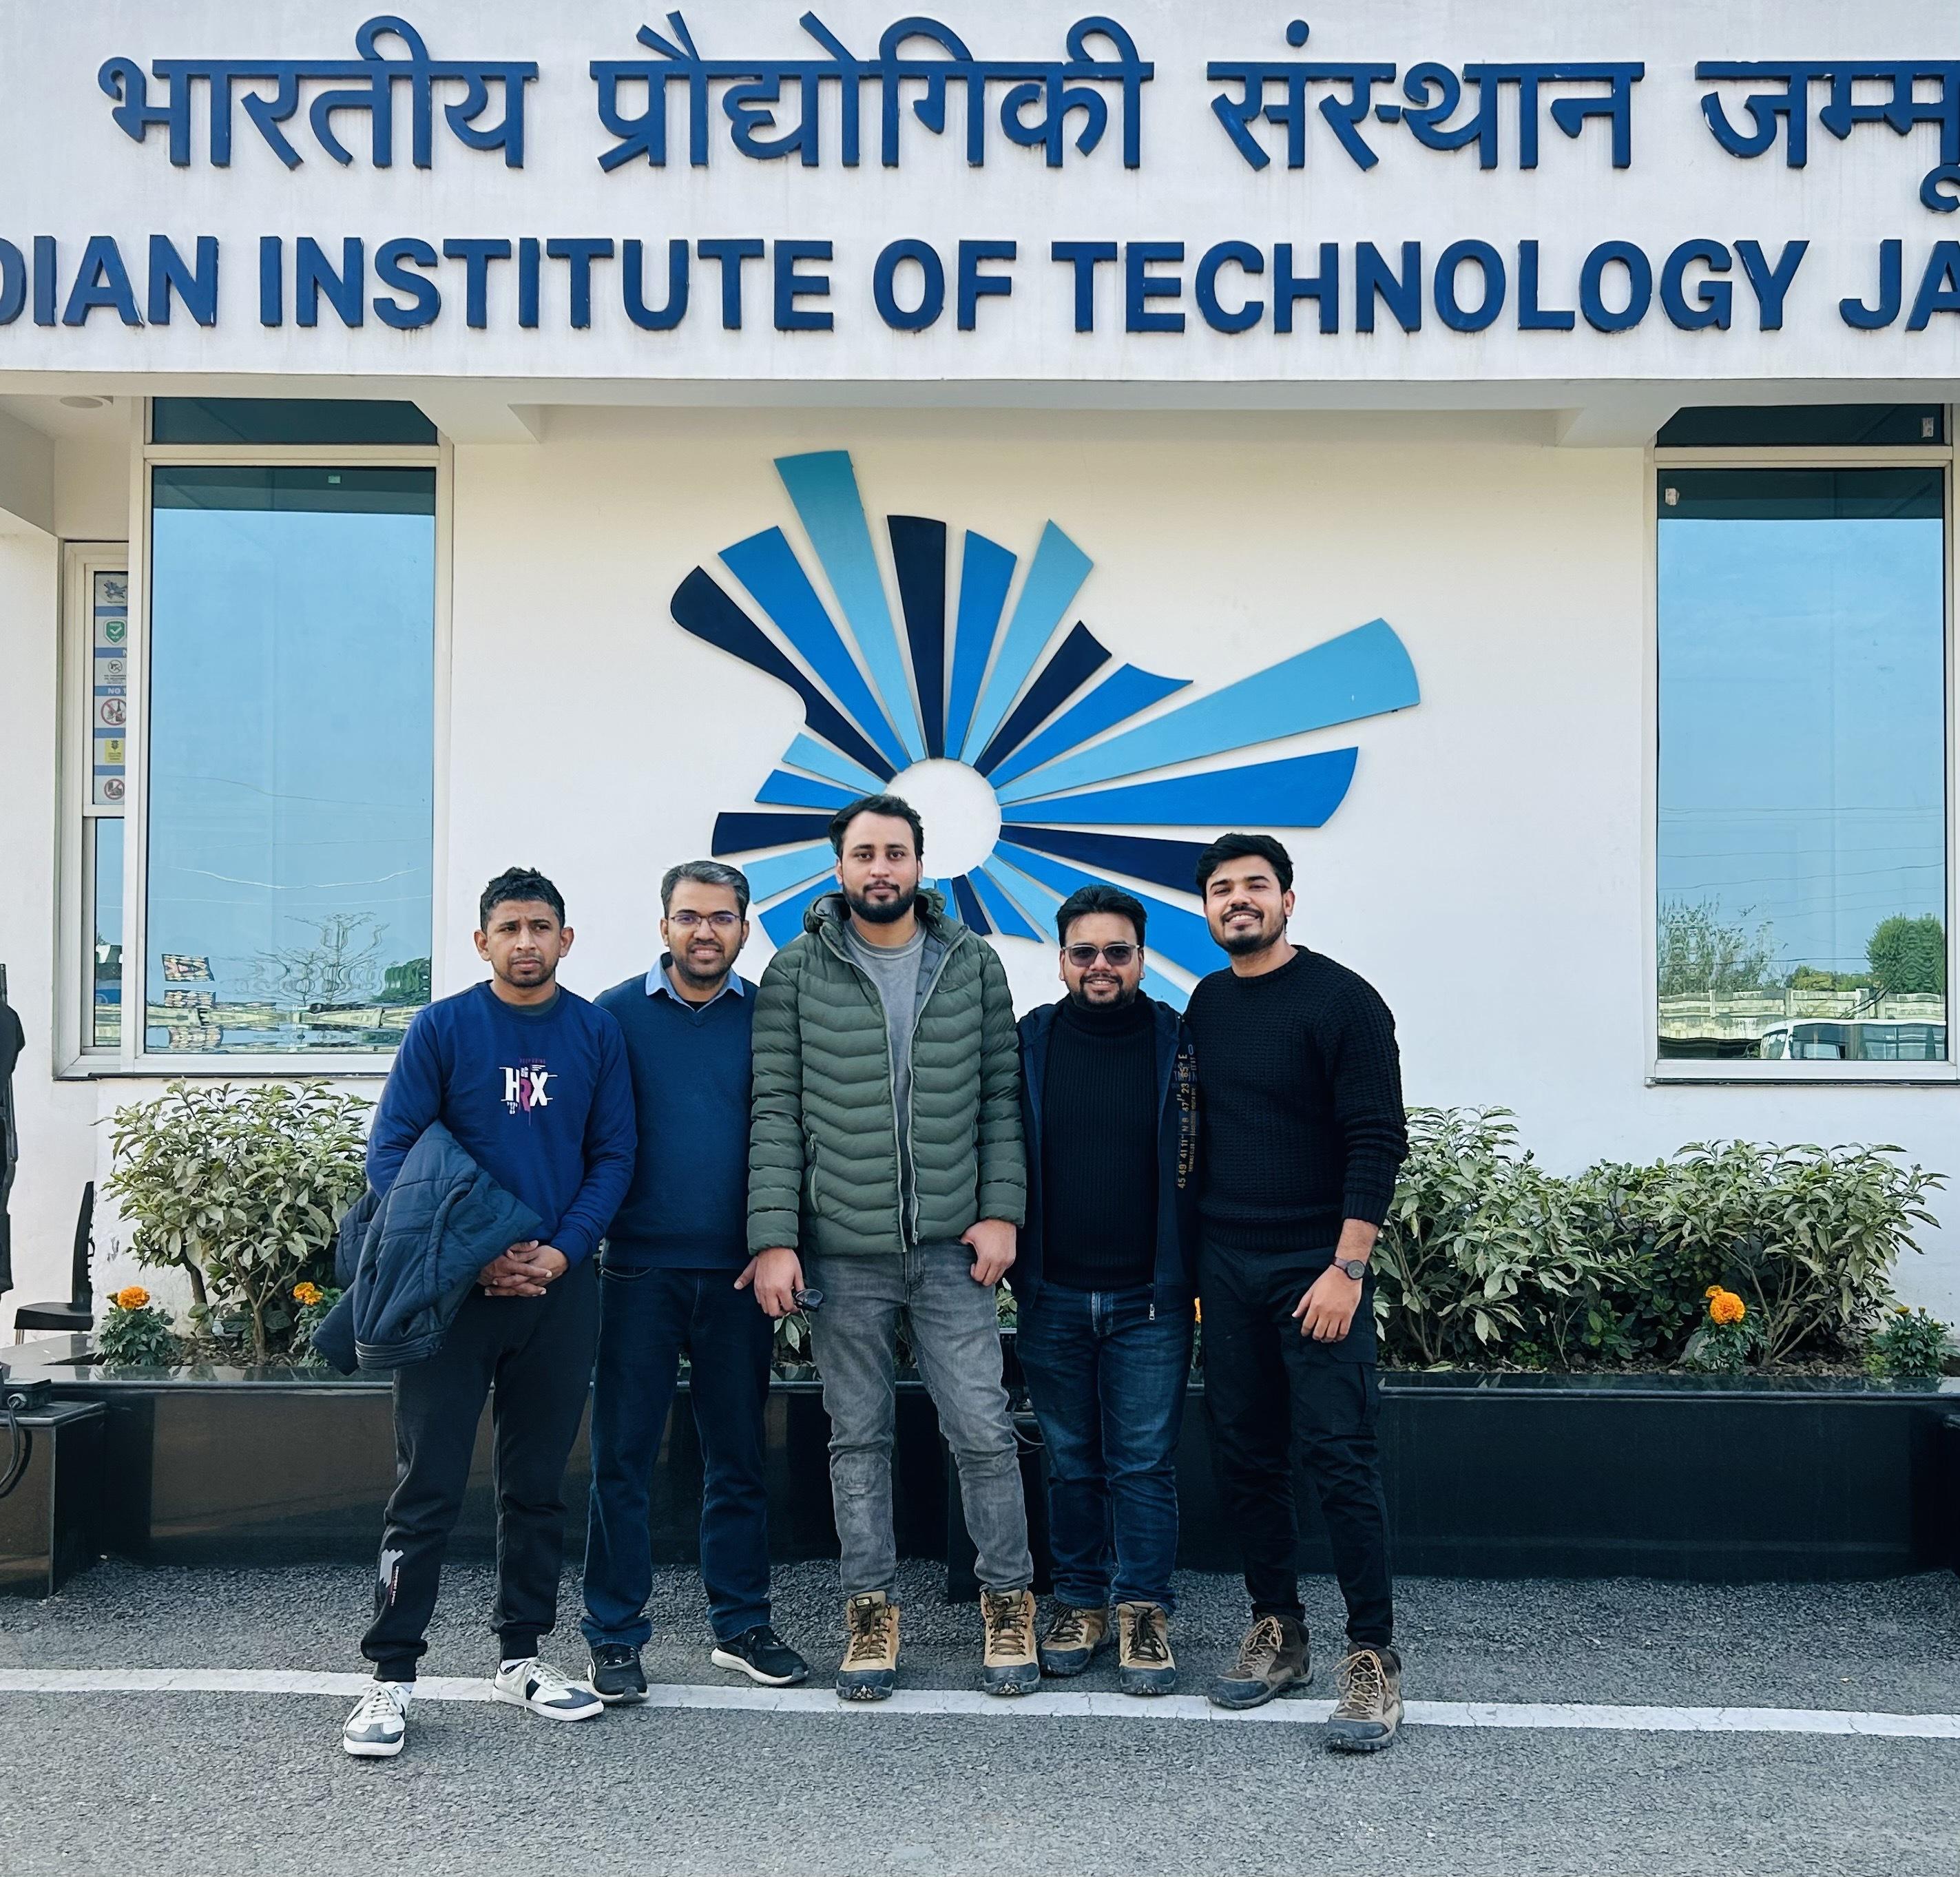

**Left To Right:** Himanshu, Kanishk, Ravi, Harshul, Satendra